# Homework 7, Part One: Lots and lots of questions about beer

### Do your importing and your setup

In [5]:
import pandas as pd

## Read in the file `craftcans.csv`, and look at the first first rows

In [6]:
df = pd.read_csv('./craftcans.csv', na_values=['Does not apply'])
df.head(5)

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.50%,50.0
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.90%,26.0
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.80%,19.0
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.00%,38.0
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.00%,25.0


## How many rows do you have in the data? What are the column types?

In [7]:
# df.shape[0]
# a other way to do it: len(df)

print(f"we have {len(df)} rows in the dataset")

we have 2416 rows in the dataset


In [8]:
df.info()
print("---------")
print(f"all 7 columns have the typ object in the dataset")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Beer      2416 non-null   object 
 1   Brewery   2410 non-null   object 
 2   Location  2410 non-null   object 
 3   Style     2405 non-null   object 
 4   Size      2410 non-null   object 
 5   ABV       2348 non-null   object 
 6   IBUs      1405 non-null   float64
dtypes: float64(1), object(6)
memory usage: 132.3+ KB
---------
all 7 columns have the typ object in the dataset


# Checking out our alcohol

## What are the top 10 producers in terms of different cans of beer?

In [9]:
df.keys()

Index(['Beer', 'Brewery', 'Location', 'Style', 'Size', 'ABV', 'IBUs'], dtype='object')

In [10]:
# What are the top 10 producers in terms of different cans of beer?
df['Brewery'].value_counts().head(10)

Brewery
Brewery Vivant                62
Oskar Blues Brewery           46
Sun King Brewing Company      38
Cigar City Brewing Company    25
Sixpoint Craft Ales           24
Hopworks Urban Brewery        23
Stevens Point Brewery         22
Great Crescent Brewery        20
21st Amendment Brewery        20
Bonfire Brewing Company       19
Name: count, dtype: int64

## What is the most common ABV? (alcohol by volume)

In [11]:
df.value_counts('ABV').sort_values(ascending=False).head(10)

ABV
5.00%    215
5.50%    158
6.00%    125
6.50%    123
5.20%    107
7.00%     92
4.50%     89
4.80%     72
5.80%     66
5.60%     66
Name: count, dtype: int64

In [12]:
most_common_ABV = df.value_counts('ABV').sort_values(ascending=False).head(1)
print(f"The most common ABV is {most_common_ABV.index[0]} with {most_common_ABV.values[0]} occurences")

The most common ABV is 5.00% with 215 occurences


## Oh, weird, ABV isn't a number. Convert it to a number for me, please.

It's going to take a few steps!

### First, let's just look at the ABV column by itself

In [13]:
df['ABV']

0       4.50%
1       4.90%
2       4.80%
3       6.00%
4       6.00%
        ...  
2411    5.30%
2412    9.90%
2413    8.00%
2414    8.70%
2415    6.50%
Name: ABV, Length: 2416, dtype: object

### Hm, `%` isn't part of  a number. Let's remove it.

When you're confident you got it right, save the results back into the `ABV` column.

- *Tip: In programming the easiest way to remove something is to *replacing it with nothing*.*
- *Tip: "nothing" might seem like `NaN` sinc we talked about it a lot in class, but in this case it isn't! It's just an empty string, like ""*
- *Tip: `.replace` is used for replacing ENTIRE cells, while `.str.replace` is useful for replacing PARTS of cells (see my New York example)*

In [14]:
# remove % in ABV and save the changes to the column
df['ABV'].str.replace('%', '').astype(float)

0       4.5
1       4.9
2       4.8
3       6.0
4       6.0
       ... 
2411    5.3
2412    9.9
2413    8.0
2414    8.7
2415    6.5
Name: ABV, Length: 2416, dtype: float64

### Now let's turn `ABV` into a numeric data type

Save the results back into the `ABV` column (again), and then check `df.dtypes` to make sure it worked.

- *Tip: We used `.astype(int)` during class, but this has a decimal in it...*

In [15]:
# replace in column ABV the % with nothing and convert the column to float. store the changes in the column ABV
df['ABV'] = df['ABV'].str.replace('%', '').astype(float)


In [16]:
df['ABV']

0       4.5
1       4.9
2       4.8
3       6.0
4       6.0
       ... 
2411    5.3
2412    9.9
2413    8.0
2414    8.7
2415    6.5
Name: ABV, Length: 2416, dtype: float64

## What's the ABV of the average beer look like?

### Show me in two different ways: one command to show the `median`/`mean`/etc, and secondly show me a chart

In [17]:
df['ABV'].mean()
print(f"The average ABV is {df['ABV'].mean():.2f}")

The average ABV is 5.98


In [18]:
df['ABV'].median()
print(f"The median ABV is {df['ABV'].median():.2f}")

The median ABV is 5.60


<Axes: title={'center': 'Distribution ABV'}, ylabel='Frequency'>

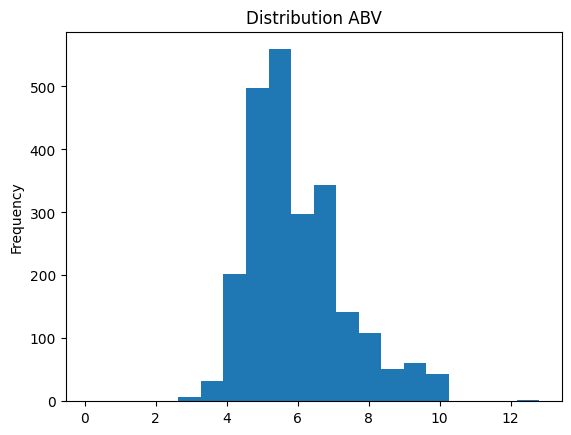

In [19]:
df['ABV'].plot(kind='hist', bins=20, title='Distribution ABV')

### We don't have ABV for all of the beers, how many are we missing them from?

- *Tip: You can use `isnull()` or `notnull()` to see where a column is missing data.*
- *Tip: You just want to count how many `True`s and `False`s there are.*
- *Tip: What does `.sum()` do when you have trues and falses? What about `.value_counts()`?*

In [20]:
abv_isnull_sum = df['ABV'].isnull().sum()
print(f"There are {abv_isnull_sum} missing values in the column ABV")


There are 68 missing values in the column ABV


In [21]:
df['ABV'].notnull().sum()

2348

In [22]:
df['ABV'].isnull().value_counts()

ABV
False    2348
True       68
Name: count, dtype: int64

# Looking at location

Brooklyn used to produce 80% of the country's beer! Let's see if it's still true.

## What are the top 10 cities in the US for canned craft beer?

In [23]:
df['Location'].value_counts().head(10)

Location
Grand Rapids, MI    66
Chicago, IL         55
Portland, OR        52
Indianapolis, IN    43
San Diego, CA       42
Boulder, CO         41
Denver, CO          40
Brooklyn, NY        38
Seattle, WA         35
Longmont, CO        33
Name: count, dtype: int64

## List all of the beer from Brooklyn, NY

In [24]:
df[df['Location'] == 'Brooklyn, NY']

,Beer,Brewery,Location,Style,Size,ABV,IBUs
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.0,52.0
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.2,16.0
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.0,NaN
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.0,NaN
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.2,7.0
439,Molotov Lite,Evil Twin Brewing,"Brooklyn, NY",American Double / Imperial IPA,16 oz.,8.5,NaN
588,Bengali,Sixpoint Craft Ales,"Brooklyn, NY",American IPA,"24 oz. ""Silo Can""",6.5,62.0
713,Sensi Harvest,Sixpoint Craft Ales,"Brooklyn, NY",American Pale Ale (APA),12 oz.,4.7,50.0
969,Hi-Res,Sixpoint Craft Ales,"Brooklyn, NY",American Double / Imperial IPA,12 oz.,9.9,111.0
987,KelSo Nut Brown Lager,KelSo Beer Company,"Brooklyn, NY",Euro Dark Lager,12 oz.,5.7,19.0


## What brewery in Brooklyn puts out the most different cans of beer?

In [25]:
# The most common brewery in Brooklyn, NY
df[df['Location'] == 'Brooklyn, NY']['Brewery'].value_counts().head(1)

Brewery
Sixpoint Craft Ales    24
Name: count, dtype: int64

## What are the five most common styles of beer produced by Sixpoint?

In [26]:
df[df['Brewery'] == 'Sixpoint Craft Ales']['Style'].value_counts().head(5)

Style
American IPA                      4
Baltic Porter                     2
American Double / Imperial IPA    2
German Pilsener                   2
Cream Ale                         2
Name: count, dtype: int64

## List all of the breweries in New York state.

- *Tip: We want to match *part* of the `Location` column, but not all of it.*
- *Tip: Watch out for `NaN` values! You might be close, but you'll need to pass an extra parameter to make it work without an error.*
- *Tip: If you want to be extra fancy, you can create a new column with just the state abbreviation and then filter on that.*

In [27]:
# All breweries in New York
df[df['Location'].str.contains('NY', na=False)]

# Step 1 & 2: Extract state abbreviation and create a new column 'State'
df['State'] = df['Location'].str[-2:]

# Step 3: Filter rows where 'State' is 'NY'
filtered_df = df[df['State'] == 'NY']

filtered_df

,Beer,Brewery,Location,Style,Size,ABV,IBUs,State
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.0,52.0,NY
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.2,16.0,NY
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.0,NaN,NY
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.0,NaN,NY
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.2,7.0,NY
...,...,...,...,...,...,...,...,...
2351,Brooklyn Lager (12 oz.),Brooklyn Brewery,"Brooklyn, NY",American Amber / Red Lager,12 oz.,5.2,NaN,NY
2364,Heinnieweisse Weissebier,Butternuts Beer and Ale,"Garrattsville, NY",Hefeweizen,12 oz.,4.9,NaN,NY
2365,Snapperhead IPA,Butternuts Beer and Ale,"Garrattsville, NY",American IPA,12 oz.,6.8,NaN,NY
2366,Moo Thunder Stout,Butternuts Beer and Ale,"Garrattsville, NY",Milk / Sweet Stout,12 oz.,4.9,NaN,NY


### Now *count* all of the breweries in New York state

In [28]:
df[df['State'] == 'NY']['State'].value_counts()

State
NY    74
Name: count, dtype: int64

# Measuring International Bitterness Units

## Display all of the IPAs

Include American IPAs, Imperial IPAs, and anything else with "IPA in it."

IPA stands for [India Pale Ale](https://www.bonappetit.com/story/ipa-beer-styles), and is probably the most popular kind of beer in the US for people who are drinking [craft beer](https://www.craftbeer.com/beer/what-is-craft-beer).

In [29]:
# Display all rows where the 'Style' column contains the string 'IPA'
df[df['Style'].str.contains('IPA', na=False)]

,Beer,Brewery,Location,Style,Size,ABV,IBUs,State
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.5,50.0,MN
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.0,68.0,KY
14,Rico Sauvin,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,7.6,68.0,KY
17,Pile of Face,Against the Grain Brewery,"Louisville, KY",American IPA,16 oz.,6.0,65.0,KY
24,Habitus (2014),Mike Hess Brewing Company,"San Diego, CA",American Double / Imperial IPA,16 oz.,8.0,100.0,CA
...,...,...,...,...,...,...,...,...
2403,Abrasive Ale,Surly Brewing Company,"Brooklyn Center, MN",American Double / Imperial IPA,16 oz.,9.7,120.0,MN
2406,Furious,Surly Brewing Company,"Brooklyn Center, MN",American IPA,16 oz.,6.2,99.0,MN
2408,Brew Free! or Die IPA,21st Amendment Brewery,"San Francisco, CA",American IPA,12 oz.,7.0,65.0,CA
2412,GUBNA Imperial IPA,Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,9.9,100.0,CO


IPAs are usually pretty hoppy and bitter. IBU stands for [International Bitterness Unit](http://www.thebrewenthusiast.com/ibus/), and while a lot of places like to brag about having the most bitter beer (it's an American thing!), IBUs don't necessary *mean anything*.

Let's look at how different beers have different IBU measurements.

## Try to get the average IBU measurement across all beers

In [30]:
df['IBUs'].mean()

42.71316725978647

### Oh no, it doesn't work!

It looks like some of those values *aren't numbers*. There are two ways to fix this:

- *Tip: If you use [`na_values=`](http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.read_csv.html). be sure to go add it up top and run all of your cells again. You can also use `.replace` but I don't think that's as good of an idea.*
- *Tip: Make sure you're giving `na_values=` a LIST, not just a string*

### Now try to get the average IBUs again

In [31]:
# First time it didn't work, because there were missing values in the Data which said "Does not apply"
# So we went up to where we read the csv and edited it like this:
    # df = pd.read_csv("craftcans.csv", na_values=["Does not apply"])
    # df.head()
# result: whenever the Data says "Does not apply" the program converts it to NaN
# we ran the whole code again and then it worked
df['IBUs'] = df['IBUs'].astype(float)

df['IBUs'].mean()
print(f"The average IBUs is {df['IBUs'].mean():.2f}")

The average IBUs is 42.71


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Beer      2416 non-null   object 
 1   Brewery   2410 non-null   object 
 2   Location  2410 non-null   object 
 3   Style     2405 non-null   object 
 4   Size      2410 non-null   object 
 5   ABV       2348 non-null   float64
 6   IBUs      1405 non-null   float64
 7   State     2410 non-null   object 
dtypes: float64(2), object(6)
memory usage: 151.1+ KB


## Draw the distribution of IBU measurements, but with *twenty* bins instead of the default of 10

- *Tip: Every time I ask for a distribution, I'm looking for a histogram*

<Axes: title={'center': 'Distribution IBUs'}, ylabel='Frequency'>

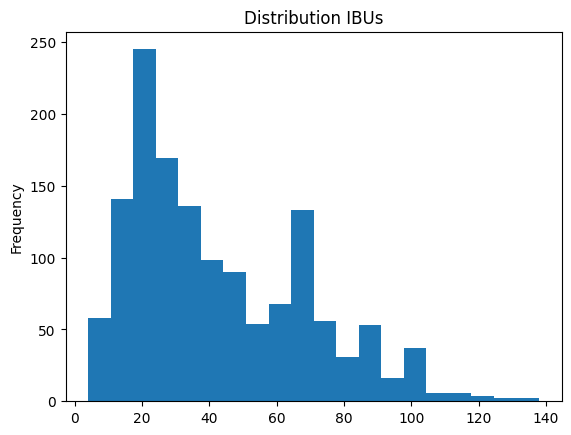

In [33]:
# draw a histogram of the IBUs column
df['IBUs'].plot(kind='hist', bins=20, title='Distribution IBUs')

## Hm, Interesting distribution. List all of the beers with IBUs above the 75th percentile

- *Tip: There's a single command that gives you the 25/50/75th percentile*
- *Tip: You can just manually type the number when you list those beers*

In [34]:
# describe the IBUs column. prints the count, mean, std, min, 25%, 50%, 75%, max
df['IBUs'].describe()

count    1405.000000
mean       42.713167
std        25.954066
min         4.000000
25%        21.000000
50%        35.000000
75%        64.000000
max       138.000000
Name: IBUs, dtype: float64

In [35]:
# then print out hte 75 percentile
print(f"The 75th percentile of IBUs is {df['IBUs'].quantile(0.75)}")

The 75th percentile of IBUs is 64.0


In [36]:
# List all of the beers with IBUs above the 75th percentile
df[df['IBUs'] > df['IBUs'].quantile(0.75)]


,Beer,Brewery,Location,Style,Size,ABV,IBUs,State
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.0,68.0,KY
7,London Balling,Against the Grain Brewery,"Louisville, KY",English Barleywine,16 oz.,12.5,80.0,KY
14,Rico Sauvin,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,7.6,68.0,KY
17,Pile of Face,Against the Grain Brewery,"Louisville, KY",American IPA,16 oz.,6.0,65.0,KY
21,Excess IPL,Jack's Abby Craft Lagers,"Framingham, MA",American India Pale Lager,16 oz.,7.2,80.0,MA
...,...,...,...,...,...,...,...,...
2408,Brew Free! or Die IPA,21st Amendment Brewery,"San Francisco, CA",American IPA,12 oz.,7.0,65.0,CA
2410,Ten Fidy Imperial Stout,Oskar Blues Brewery,"Longmont, CO",Russian Imperial Stout,12 oz.,9.9,98.0,CO
2412,GUBNA Imperial IPA,Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,9.9,100.0,CO
2414,Gordon Ale (2009),Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,8.7,85.0,CO


## List all of the beers with IBUs below the 25th percentile

In [37]:
filtered_df = df[df['IBUs'] < df['IBUs'].quantile(0.25)].sort_values('IBUs', ascending=False)
filtered_df

,Beer,Brewery,Location,Style,Size,ABV,IBUs,State
1263,Sanitas Saison Ale,Sanitas Brewing Company,"Boulder, CO",Saison / Farmhouse Ale,12 oz.,5.8,20.0,CO
1453,Wild Plum Farmhouse Ale,Tallgrass Brewing Company,"Manhattan, KS",Saison / Farmhouse Ale,16 oz.,5.6,20.0,KS
1265,Double D Blonde (2013),Hop Valley Brewing Company,"Springfield, OR",American Blonde Ale,12 oz.,4.9,20.0,OR
1313,UFO Pumpkin,Harpoon Brewery,"Boston, MA",Pumpkin Ale,12 oz.,5.9,20.0,MA
1320,Greenbelt Farmhouse Ale,Armadillo Ale Works,"Denton, TX",Saison / Farmhouse Ale,12 oz.,5.1,20.0,TX
...,...,...,...,...,...,...,...,...
1061,Chickawawa Lemonale,Great River Brewery,"Davenport, IA",Fruit / Vegetable Beer,12 oz.,5.0,5.0,IA
318,18th Anniversary Gose,Real Ale Brewing Company,"Blanco, TX",Gose,12 oz.,4.4,5.0,TX
1860,Summer Solstice Cerveza Crema (2009),Anderson Valley Brewing Company,"Boonville, CA",Cream Ale,12 oz.,5.6,4.0,CA
1303,Summer Solstice,Anderson Valley Brewing Company,"Boonville, CA",Cream Ale,12 oz.,5.6,4.0,CA


## List the median IBUs of each type of beer. Graph it.

Put the highest at the top, and the missing ones at the bottom.

- Tip: Look at the options for `sort_values` to figure out the `NaN` thing. The `?` probably won't help you here.

In [38]:
# List the median IBUs of each type of beer.
df.groupby('Style')['IBUs'].median().sort_values(ascending=False)

Style
American Barleywine                   96.0
Russian Imperial Stout                94.0
American Double / Imperial IPA        91.0
American Double / Imperial Pilsner    85.0
American Black Ale                    73.0
                                      ... 
Kristalweizen                          NaN
Low Alcohol Beer                       NaN
Mead                                   NaN
Rauchbier                              NaN
Shandy                                 NaN
Name: IBUs, Length: 99, dtype: float64

<Axes: title={'center': 'Median IBUs by Style'}, ylabel='Frequency'>

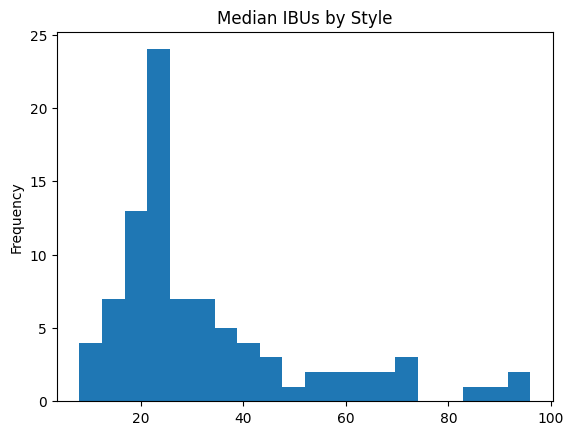

In [39]:
# Graph it
df.groupby('Style')['IBUs'].median().sort_values(ascending=True).plot(kind='hist', bins=20, title='Median IBUs by Style')

## Hmmmm, it looks like they are generally different styles. What are the most common 5 styles of high-IBU beer vs. low-IBU beer?

- *Tip: You'll want to think about it in three pieces - filtering to only find the specific beers beers, then finding out what the most common styles are, then getting the top 5.*
- *Tip: You CANNOT do this in one command. It's going to be one command for the high and one for the low.*
- *Tip: "High IBU" means higher than 75th percentile, "Low IBU" is under 25th percentile*

In [40]:
# List the top 5 styles of high-IBU beer
high_IBU = df[df['IBUs'] > df['IBUs'].quantile(0.75)]
high_IBU['Style'].value_counts().sort_values(ascending=False).head(5)



Style
American IPA                      195
American Double / Imperial IPA     72
American Pale Ale (APA)            18
American Black Ale                 15
American Strong Ale                 9
Name: count, dtype: int64

In [41]:
# List the top 5 styles of low-IBU beer
low_IBU = df[df['IBUs'] < df['IBUs'].quantile(0.25)]
low_IBU['Style'].value_counts().sort_values(ascending=True).head(5)


Style
Tripel                       1
Dortmunder / Export Lager    1
Munich Dunkel Lager          1
English Pale Ale             1
Roggenbier                   1
Name: count, dtype: int64

## Get the average IBU of "Witbier", "Hefeweizen" and "American Pale Wheat Ale" styles

I'm counting these as wheat beers. If you see any other wheat beer categories, feel free to include them. I want ONE measurement and ONE graph, not three separate ones. And 20 to 30 bins in the histogram, please.

- *Tip: I hope that `isin` is in your toolbox*

In [42]:
filtered_df_wheat_beers = df[df['Style'].isin(['Witbier', 'Hefeweizen', 'American Pale Wheat Ale'])]
print(f"The average IBU of Witbier, Hefeweizen and American Pale Wheat Ale is {filtered_df_wheat_beers['IBUs'].mean():.2f}")



The average IBU of Witbier, Hefeweizen and American Pale Wheat Ale is 18.98


## Draw a histogram of the IBUs of those beers

<Axes: title={'center': 'Distribution of IBUs of Witbier, Hefeweizen and American Pale Wheat Ale'}, ylabel='Frequency'>

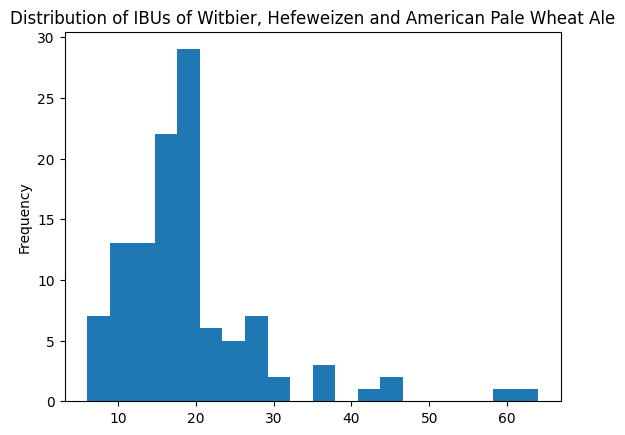

In [43]:
# Draw a histogram of the IBUs of those beers
filtered_df_wheat_beers['IBUs'].plot(kind='hist', bins=20, title='Distribution of IBUs of Witbier, Hefeweizen and American Pale Wheat Ale')

## Get the average IBU of any style with "IPA" in it (also draw a histogram)

In [44]:
filtered_df_ipa = df[df['Style'].str.contains('IPA', na=False)]
print(f"The average IBU of all IPA beers is {filtered_df_ipa['IBUs'].mean():.2f}")


The average IBU of all IPA beers is 71.95


In [45]:
filtered_df_ipa.groupby('Style')['IBUs'].mean().sort_values(ascending=False)

Style
American Double / Imperial IPA    93.320000
American IPA                      67.634551
Belgian IPA                       57.000000
English India Pale Ale (IPA)      54.714286
American White IPA                48.833333
Name: IBUs, dtype: float64

<Axes: title={'center': 'Distribution of IBUs of IPA beers'}, ylabel='Frequency'>

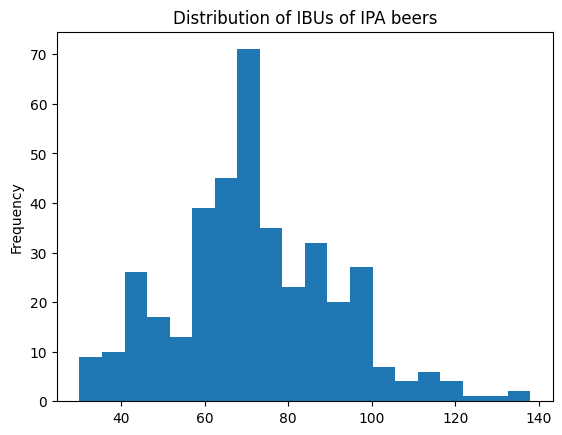

In [46]:
filtered_df_ipa['IBUs'].plot(kind='hist', bins=20, title='Distribution of IBUs of IPA beers')

<Axes: title={'center': 'Mean of the IBUs of IPA beers'}, ylabel='Style'>

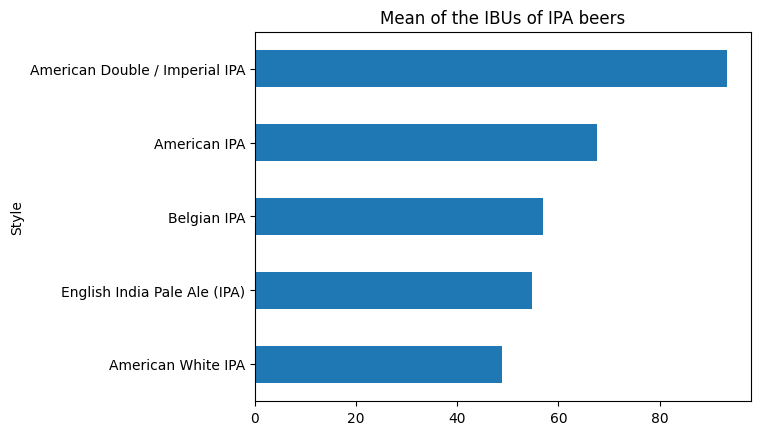

In [47]:
# plot the mean of the IBUs of the IPA beers
filtered_df_ipa.groupby('Style')['IBUs'].mean().sort_values(ascending=True).plot(kind='barh', title='Mean of the IBUs of IPA beers')

## Plot those two histograms in the same cell!

I swear the behavior of this changes every year. Does it make two charts? Does it overlap them in one?

<Axes: title={'center': 'IBUs of Wheat Beers vs. IPA'}, ylabel='Frequency'>

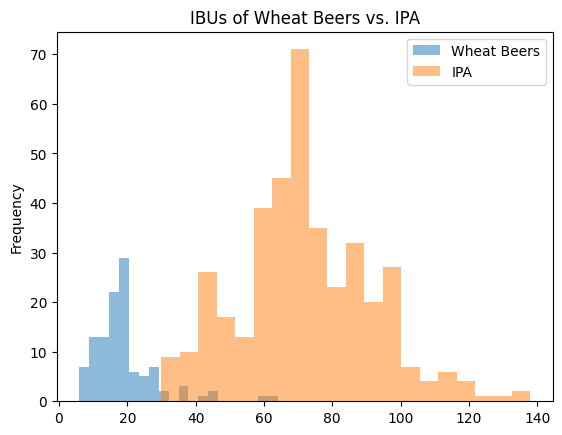

In [48]:
import matplotlib.pyplot as plt

# plot the histograms of the IBUs of Wheat Beers and IPA
# alpha is the transparency of the bars
df[df['Style'].isin(['Witbier', 'Hefeweizen', 'American Pale Wheat Ale'])]['IBUs'].plot(kind='hist', bins=20, alpha=0.5, label='Wheat Beers', title='IBUs of Wheat Beers vs. IPA', legend=True)
df[df['Style'].str.contains('IPA', na=False)]['IBUs'].plot(kind='hist', bins=20, alpha=0.5, label='IPA', legend=True)

## Compare the ABV of wheat beers vs. IPAs : their IBUs were really different, but how about their alcohol percentage?

Wheat beers might include witbier, hefeweizen, American Pale Wheat Ale, and anything else you think is wheaty. IPAs probably have "IPA" in their name.

<Axes: title={'center': 'IBUs of Wheat Beers vs. IPA'}, ylabel='Frequency'>

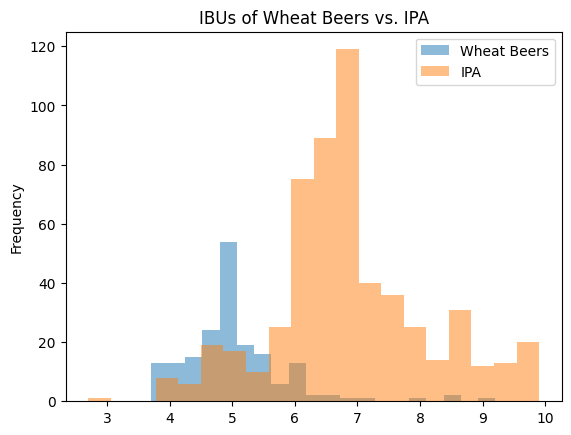

In [49]:
df[df['Style'].isin(['Witbier', 'Hefeweizen', 'American Pale Wheat Ale'])]['ABV'].plot(kind='hist', bins=20, alpha=0.5, label='Wheat Beers', title='IBUs of Wheat Beers vs. IPA', legend=True)
df[df['Style'].str.contains('IPA', na=False)]['ABV'].plot(kind='hist', bins=20, alpha=0.5, label='IPA', legend=True)

## Good work!